# Libraries

In [35]:
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

from pandas import read_excel, DataFrame,to_datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, accuracy_score


# Load Data

In [2]:
data_file_path = r'data (1).xlsx'

meta_data_df = read_excel(data_file_path,sheet_name=0)
meta_data_df.head()

,Columns,Description,Variable
0,appointmentId,Unique id,Independent
1,inspectionStartTime,inspection date,Independent
2,year,registration year,Independent
3,month,registration month,Independent
4,engineTransmission_battery_value,condition ok: yes\nelse : no,Independent


In [3]:
engine_df = read_excel(data_file_path,sheet_name=1)
engine_df['inspectionStartTime'] = pd.to_datetime(engine_df['inspectionStartTime'])
engine_df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0


In [4]:
orig_cols = engine_df.columns.tolist()

# Data Preprocessing

## Target column encoding

In [5]:

trgt_col_map = {0.5:'A',
                1.0:'B',
                1.5:'C',
                2.0:'D',
                2.5:'E',
                3.0:'F',
                3.5:'G',
                4.0:'H',
                4.5:'I',
                5.0:'J'
                }

## EDA

In [6]:
df_dups = engine_df.drop(['appointmentId','inspectionStartTime'],axis=1)
df_dups = df_dups.drop_duplicates()


In [7]:
# There are 6 duplicate rows present in the data
df_dups.reset_index()

,index,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,0,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,1,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,2,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,3,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,4,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296,26302,2013,3,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,Electrical wiring Damaged,NaN,NaN,NaN,NaN,Petrol + CNG,64532,4.0
26297,26303,2007,8,No,Weak,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,88051,4.0
26298,26304,2004,7,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,22656,3.5
26299,26305,2010,12,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,126015,4.5


In [8]:
df_dups.describe()

,year,month,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_cc_value_10,odometer_reading,rating_engineTransmission
count,26301.000000,26301.000000,0.0,0.0,26301.000000,26301.000000
mean,2010.857914,5.462568,NaN,NaN,76459.518155,3.625147
std,3.765543,3.584008,NaN,NaN,46766.580461,0.846966
min,1989.000000,1.000000,NaN,NaN,1.000000,0.500000
25%,2008.000000,2.000000,NaN,NaN,46383.000000,3.500000
50%,2011.000000,5.000000,NaN,NaN,72013.000000,4.000000
75%,2014.000000,9.000000,NaN,NaN,98289.000000,4.000000
max,2019.000000,12.000000,NaN,NaN,999999.000000,5.000000


In [9]:
# Its crucial to treat training and testing data separately

X_train, X_test, y_train, y_test = train_test_split(engine_df.drop(['rating_engineTransmission'],axis=1), engine_df['rating_engineTransmission'], test_size=0.2, random_state=143)
train_df = pd.concat([X_train,y_train], axis=1)
test_df = pd.concat([X_test,y_test], axis=1)
train_df

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
6682,aj_6683,2019-01-14 13:27:42,2015,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,103268,4.0
16687,aj_16688,2019-02-02 14:14:06,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,99960,3.5
15535,aj_15536,2019-02-26 14:44:09,2017,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,4082,5.0
223,aj_224,2019-02-17 15:02:33,2007,7,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,88405,3.0
7848,aj_7849,2019-03-09 16:57:30,2012,4,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Electrical wiring Damaged,NaN,NaN,NaN,NaN,Diesel,74153,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,aj_16547,2019-02-24 17:08:16,2010,10,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,61819,3.0
25121,aj_25122,2019-02-09 14:26:54,2008,3,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,40496,4.0
17937,aj_17938,2019-04-10 15:55:31,2012,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,54026,4.0
2201,aj_2202,2019-01-31 12:51:03,2004,1,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,133966,3.0


In [10]:
# check for dtypes
df_dtypes = engine_df.dtypes
df_dtypes

appointmentId                                  object
inspectionStartTime                    datetime64[ns]
year                                            int64
month                                           int64
engineTransmission_battery_value               object
                                            ...      
engineTransmission_comments_value_3            object
engineTransmission_comments_value_4            object
fuel_type                                      object
odometer_reading                                int64
rating_engineTransmission                     float64
Length: 73, dtype: object

In [11]:
train_df = train_df.drop(['appointmentId'],axis=1)
train_df

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
6682,2019-01-14 13:27:42,2015,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,103268,4.0
16687,2019-02-02 14:14:06,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,99960,3.5
15535,2019-02-26 14:44:09,2017,1,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,4082,5.0
223,2019-02-17 15:02:33,2007,7,No,Weak,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,88405,3.0
7848,2019-03-09 16:57:30,2012,4,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,Electrical wiring Damaged,NaN,NaN,NaN,NaN,Diesel,74153,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2019-02-24 17:08:16,2010,10,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,61819,3.0
25121,2019-02-09 14:26:54,2008,3,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,40496,4.0
17937,2019-04-10 15:55:31,2012,1,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,54026,4.0
2201,2019-01-31 12:51:03,2004,1,No,Weak,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,133966,3.0


## Handling missing values

In [12]:
#check for nan values and its percentage 
missing_perc = (train_df.isna().sum()/ train_df.shape[0])*100
missing_perc

inspectionStartTime                       0.000000
year                                      0.000000
month                                     0.000000
engineTransmission_battery_value          0.000000
engineTransmission_battery_cc_value_0    87.127584
                                           ...    
engineTransmission_comments_value_3      99.771917
engineTransmission_comments_value_4      99.942979
fuel_type                                 0.000000
odometer_reading                          0.000000
rating_engineTransmission                 0.000000
Length: 72, dtype: float64

In [13]:
# filter the columns with more than 50% of nan/missing values
# and remove these columns as they don't hold any significant info
## HERE 50% is INDUSTRY standards
missing_perc_80 = missing_perc[missing_perc > 80]
missing_perc_80

engineTransmission_battery_cc_value_0                    87.127584
engineTransmission_battery_cc_value_1                    98.384414
engineTransmission_battery_cc_value_2                    99.748159
engineTransmission_battery_cc_value_3                    99.938228
engineTransmission_battery_cc_value_4                    99.985745
engineTransmission_engineOilLevelDipstick_cc_value_0     98.541221
engineTransmission_engineOil_cc_value_3                  85.816108
engineTransmission_engineOil_cc_value_4                  93.309575
engineTransmission_engineOil_cc_value_5                  97.709670
engineTransmission_engineOil_cc_value_6                  99.539083
engineTransmission_engineOil_cc_value_7                  99.947731
engineTransmission_engineOil_cc_value_8                  99.990497
engineTransmission_engineOil_cc_value_9                 100.000000
engineTransmission_engine_cc_value_1                     80.750772
engineTransmission_engine_cc_value_2                     91.13

In [14]:
# missing_perc_80.index.tolist()

In [15]:
train_df = train_df.drop( missing_perc_80.index.tolist(), axis=1)
train_df

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
6682,2019-01-14 13:27:42,2015,5,Yes,Yes,Yes,NaN,NaN,NaN,Yes,...,Yes,NaN,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG,103268,4.0
16687,2019-02-02 14:14:06,2013,1,Yes,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,No,...,Yes,NaN,Yes,NO Blow-by,No,Spongy,Yes,Petrol,99960,3.5
15535,2019-02-26 14:44:09,2017,1,Yes,Yes,Yes,NaN,NaN,NaN,Yes,...,Yes,NaN,Yes,NO Blow-by,Yes,NaN,Yes,Petrol,4082,5.0
223,2019-02-17 15:02:33,2007,7,No,Yes,No,Dirty,NaN,NaN,No,...,Yes,NaN,Yes,NO Blow-by,No,Hard,Yes,Petrol,88405,3.0
7848,2019-03-09 16:57:30,2012,4,Yes,Yes,No,Dirty,NaN,NaN,Yes,...,Yes,NaN,No,Back Compression Exist,No,Auto Transmission Not Satisfactory,No,Diesel,74153,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2019-02-24 17:08:16,2010,10,Yes,Yes,No,Leakage from Tappet Cover,NaN,NaN,No,...,No,Silencer assembly damaged,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,61819,3.0
25121,2019-02-09 14:26:54,2008,3,Yes,Yes,No,Dirty,Leakage from Side cover,NaN,Yes,...,No,Noise from silencer assembly,Yes,NO Blow-by,No,Hard,No,Petrol,40496,4.0
17937,2019-04-10 15:55:31,2012,1,Yes,Yes,Yes,NaN,NaN,NaN,Yes,...,Yes,NaN,Yes,NO Blow-by,Yes,NaN,Yes,Diesel,54026,4.0
2201,2019-01-31 12:51:03,2004,1,No,Yes,No,Level Low,Leaking,Leakage from Tappet Cover,No,...,Yes,NaN,No,Back Compression Exist,No,Hard,Yes,Petrol,133966,3.0


In [16]:
# check for unique values i.e variance of data

# variances = train_df.nunique()
# variances

In [17]:
# df_dups = df_filtr.drop(['inspectionStartTime'],axis=1)
# df_dups = df_dups.drop_duplicates()
# df_dups.reset_index()

## Data Encoding


In [18]:
# check for only object type columns
string_cols = train_df.select_dtypes(include='object').columns.tolist()
string_cols

['engineTransmission_battery_value',
 'engineTransmission_engineoilLevelDipstick_value',
 'engineTransmission_engineOil',
 'engineTransmission_engineOil_cc_value_0',
 'engineTransmission_engineOil_cc_value_1',
 'engineTransmission_engineOil_cc_value_2',
 'engineTransmission_engine_value',
 'engineTransmission_engine_cc_value_0',
 'engineTransmission_coolant_value',
 'engineTransmission_coolant_cc_value_0',
 'engineTransmission_engineMounting_value',
 'engineTransmission_engineMounting_cc_value_0',
 'engineTransmission_engineSound_value',
 'engineTransmission_engineSound_cc_value_0',
 'engineTransmission_engineSound_cc_value_1',
 'engineTransmission_engineSound_cc_value_2',
 'engineTransmission_exhaustSmoke_value',
 'engineTransmission_exhaustSmoke_cc_value_0',
 'engineTransmission_engineBlowByBackCompression_value',
 'engineTransmission_engineBlowByBackCompression_cc_value_0',
 'engineTransmission_clutch_value',
 'engineTransmission_clutch_cc_value_0',
 'engineTransmission_gearShifting

In [19]:

le = LabelEncoder()
for col in string_cols:
    train_df[col] = le.fit_transform(train_df[col])
train_df

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
6682,2019-01-14 13:27:42,2015,5,1,1,1,9,8,7,1,...,1,6,1,1,0,3,1,4,103268,4.0
16687,2019-02-02 14:14:06,2013,1,1,1,0,5,0,3,0,...,1,6,1,1,0,6,1,3,99960,3.5
15535,2019-02-26 14:44:09,2017,1,1,1,1,9,8,7,1,...,1,6,1,1,1,7,1,3,4082,5.0
223,2019-02-17 15:02:33,2007,7,0,1,0,0,8,7,0,...,1,6,1,1,0,3,1,3,88405,3.0
7848,2019-03-09 16:57:30,2012,4,1,1,0,0,8,7,1,...,1,6,0,0,0,0,0,0,74153,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2019-02-24 17:08:16,2010,10,1,1,0,3,8,7,0,...,0,4,1,1,1,7,1,4,61819,3.0
25121,2019-02-09 14:26:54,2008,3,1,1,0,0,1,7,1,...,0,3,1,1,0,3,0,3,40496,4.0
17937,2019-04-10 15:55:31,2012,1,1,1,1,9,8,7,1,...,1,6,1,1,1,7,1,0,54026,4.0
2201,2019-01-31 12:51:03,2004,1,0,1,0,6,5,3,0,...,1,6,0,0,0,3,1,3,133966,3.0


## Outlier Detection

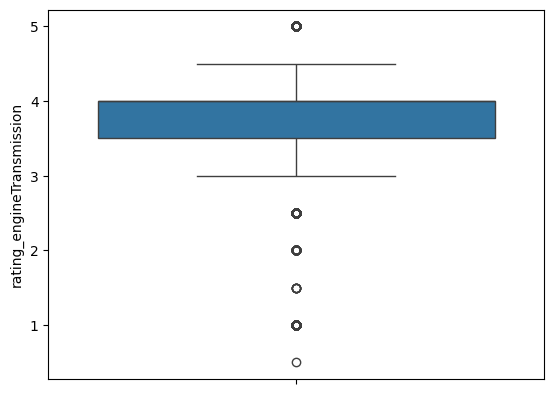

In [20]:
sns.boxplot(train_df['rating_engineTransmission'])
plt.show()

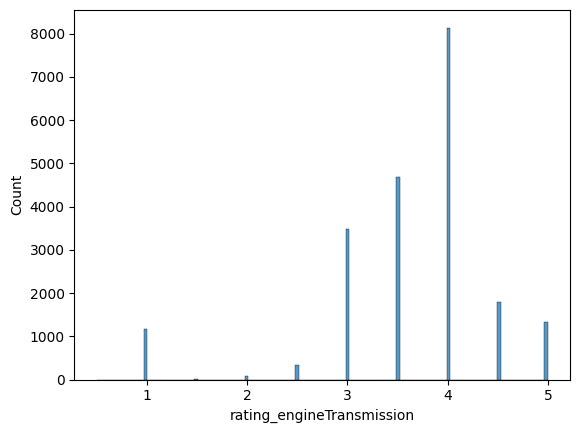

In [21]:
sns.histplot(train_df['rating_engineTransmission'])
plt.show()

In [22]:
engine_rat_outliers = train_df[train_df['rating_engineTransmission']<2]
engine_rat_outliers

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
15268,2019-04-09 12:08:58,2004,6,0,0,0,5,0,7,0,...,0,0,0,0,0,3,0,4,105505,1.0
2538,2019-01-23 17:06:33,2004,1,0,1,0,5,0,3,0,...,0,4,1,1,1,7,1,3,85387,1.0
17445,2019-01-21 11:33:46,2004,1,1,1,1,9,8,7,1,...,1,6,1,1,1,7,1,3,95355,1.0
1384,2019-04-10 18:13:16,2008,5,1,1,0,5,0,3,0,...,0,0,0,0,0,3,0,0,151021,1.0
1243,2019-04-06 17:13:37,2010,2,1,1,0,0,8,7,0,...,1,6,1,1,0,3,1,0,171500,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,2019-01-30 16:24:38,2001,5,0,1,0,5,0,3,0,...,0,0,0,0,0,6,1,4,175673,1.0
6276,2019-01-13 13:38:47,2002,1,1,1,1,9,8,7,1,...,1,6,1,1,1,7,1,3,44951,1.0
9670,2019-03-04 12:30:17,2003,7,1,1,0,5,0,3,0,...,1,6,0,0,1,7,1,3,705204,1.0
13013,2019-03-16 17:08:53,2004,1,1,1,1,9,8,7,1,...,1,6,1,1,1,7,1,4,124831,1.0


## Feature Selection

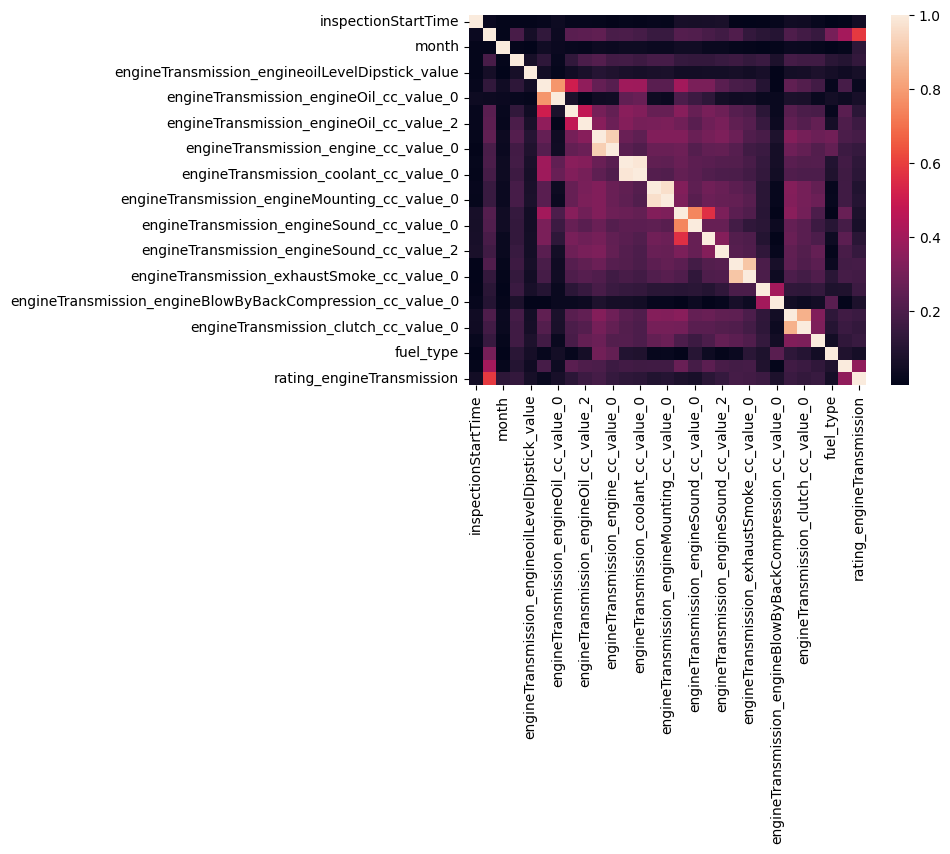

In [23]:
# checking for correlation between indpendent and dependent varaibles
df_corr = train_df#[['engineTransmission_battery_value','rating_engineTransmission']]
correlation = DataFrame(abs(df_corr.corr()))
# correlation = correlation[correlation>0.4]
sns.heatmap(correlation)
plt.show()

In [24]:
correlation

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
inspectionStartTime,1.000000,0.027841,0.009265,0.008965,0.009507,0.018374,0.038024,0.018211,0.017200,0.014778,...,0.007690,0.004195,0.005390,0.016252,0.044454,0.043330,0.021336,0.001535,0.008995,0.050137
year,0.027841,1.000000,0.011351,0.188215,0.058107,0.132864,0.034110,0.232479,0.238730,0.246909,...,0.207521,0.133350,0.112456,0.101065,0.206784,0.175590,0.146079,0.301662,0.408572,0.588087
month,0.009265,0.011351,1.000000,0.008667,0.000494,0.044311,0.030862,0.023257,0.018401,0.035152,...,0.015957,0.009581,0.004024,0.009925,0.031532,0.025025,0.013516,0.003809,0.015128,0.119778
engineTransmission_battery_value,0.008965,0.188215,0.008667,1.000000,0.060925,0.124328,0.022109,0.130632,0.199580,0.220592,...,0.163852,0.137195,0.154550,0.077467,0.183317,0.170139,0.168535,0.112871,0.096685,0.137014
engineTransmission_engineoilLevelDipstick_value,0.009507,0.058107,0.000494,0.060925,1.000000,0.049180,0.014992,0.046356,0.069238,0.101625,...,0.060987,0.048702,0.063438,0.005607,0.053173,0.056163,0.078238,0.057833,0.039919,0.062733
engineTransmission_engineOil,0.018374,0.132864,0.044311,0.124328,0.049180,1.000000,0.783518,0.509063,0.361640,0.258515,...,0.193900,0.180590,0.100095,0.005694,0.247547,0.218360,0.175949,0.019332,0.186199,0.024752
engineTransmission_engineOil_cc_value_0,0.038024,0.034110,0.030862,0.022109,0.014992,0.783518,1.000000,0.074525,0.008979,0.041339,...,0.043186,0.046972,0.025485,0.024721,0.072274,0.068374,0.025064,0.054898,0.036165,0.066711
engineTransmission_engineOil_cc_value_1,0.018211,0.232479,0.023257,0.130632,0.046356,0.509063,0.074525,1.000000,0.476758,0.300010,...,0.226493,0.206018,0.114977,0.027756,0.228213,0.196923,0.188190,0.019628,0.231121,0.114678
engineTransmission_engineOil_cc_value_2,0.017200,0.238730,0.018401,0.199580,0.069238,0.361640,0.008979,0.476758,1.000000,0.343088,...,0.246735,0.224279,0.148350,0.034503,0.253815,0.222578,0.258008,0.055815,0.205984,0.158303
engineTransmission_engine_value,0.014778,0.246909,0.035152,0.220592,0.101625,0.258515,0.041339,0.300010,0.343088,1.000000,...,0.274439,0.210382,0.191573,0.079957,0.333822,0.300162,0.273879,0.291715,0.197984,0.182282


In [25]:
df_features = train_df.copy()
df_features['purchase_date'] = to_datetime(df_features['year'].astype(str) + '-' + df_features['month'].astype(str)) #to_datetime(dict(year=df_features['year'], month=df_features['month']))
# df_features['purchase_date'] = df_features['purchase_date'].dt.strftime('%Y-%m')
# df_features['inspectionStartTime_dy'] = df_features['inspectionStartTime'].dt.strftime('%Y-%m')
df_features['time_spent'] = (df_features['inspectionStartTime'] - df_features['purchase_date']).dt.days
df_features['time_spent_bins'] = pd.cut(df_features['time_spent'],bins=50, labels=list(range(0,50)))
df_features

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission,purchase_date,time_spent,time_spent_bins
6682,2019-01-14 13:27:42,2015,5,1,1,1,9,8,7,1,...,1,0,3,1,4,103268,4.0,2015-05-01,1354,6
16687,2019-02-02 14:14:06,2013,1,1,1,0,5,0,3,0,...,1,0,6,1,3,99960,3.5,2013-01-01,2223,10
15535,2019-02-26 14:44:09,2017,1,1,1,1,9,8,7,1,...,1,1,7,1,3,4082,5.0,2017-01-01,786,3
223,2019-02-17 15:02:33,2007,7,0,1,0,0,8,7,0,...,1,0,3,1,3,88405,3.0,2007-07-01,4249,19
7848,2019-03-09 16:57:30,2012,4,1,1,0,0,8,7,1,...,0,0,0,0,0,74153,3.5,2012-04-01,2533,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2019-02-24 17:08:16,2010,10,1,1,0,3,8,7,0,...,1,1,7,1,4,61819,3.0,2010-10-01,3068,13
25121,2019-02-09 14:26:54,2008,3,1,1,0,0,1,7,1,...,1,0,3,0,3,40496,4.0,2008-03-01,3997,18
17937,2019-04-10 15:55:31,2012,1,1,1,1,9,8,7,1,...,1,1,7,1,0,54026,4.0,2012-01-01,2656,12
2201,2019-01-31 12:51:03,2004,1,0,1,0,6,5,3,0,...,0,0,3,1,3,133966,3.0,2004-01-01,5509,25


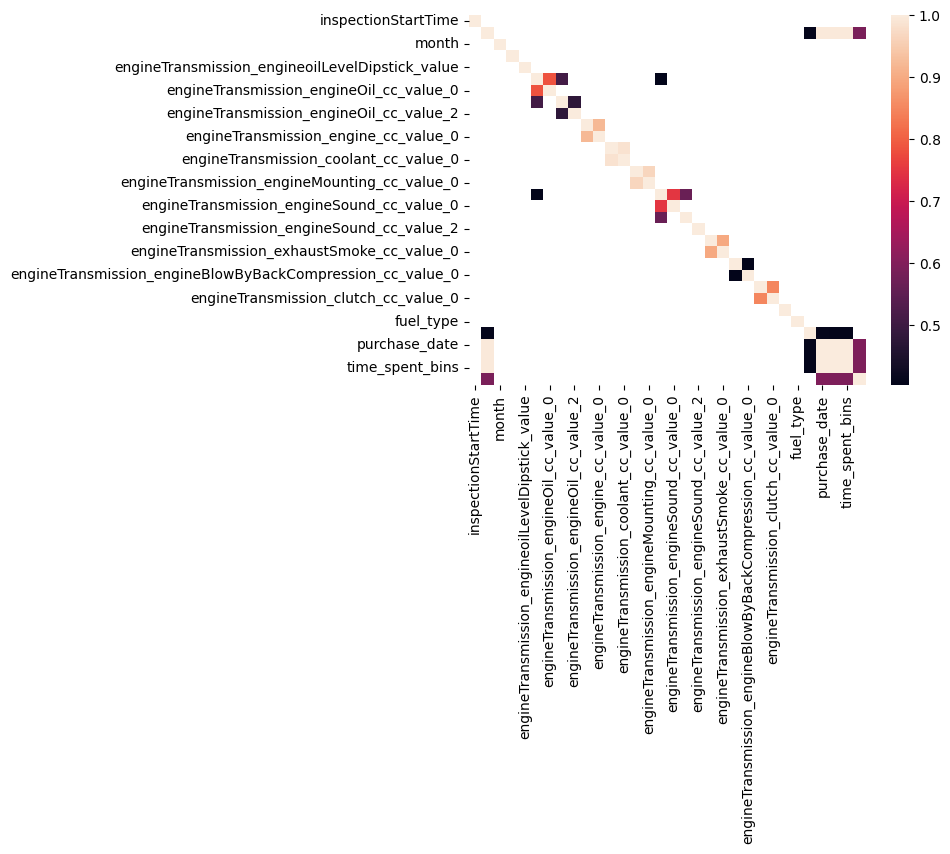

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,purchase_date,time_spent,time_spent_bins,rating_engineTransmission
inspectionStartTime,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.408572,0.996919,0.996695,0.995675,0.588087
month,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_battery_value,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_engineoilLevelDipstick_value,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_engineOil,NaN,NaN,NaN,NaN,NaN,1.000000,0.783518,0.509063,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_engineOil_cc_value_0,NaN,NaN,NaN,NaN,NaN,0.783518,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_engineOil_cc_value_1,NaN,NaN,NaN,NaN,NaN,0.509063,NaN,1.000000,0.476758,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_engineOil_cc_value_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476758,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_engine_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# checking for correlation between indpendent and dependent varaibles

column_to_move = 'rating_engineTransmission'
cols = df_features.columns.tolist()
cols.remove(column_to_move)
cols.append(column_to_move)
df_features = df_features.reindex(columns=cols)

df_corr = df_features#[['time_spent_bins','time_spent','rating_engineTransmission']]
correlation = DataFrame(abs(df_corr.corr()))
correlation = correlation[correlation>0.4]
sns.heatmap(correlation)
plt.show()
correlation

In [27]:
def filter_correlated_features(df, threshold=0.8, method='pearson'):
    """
    Filters highly correlated features from a Pandas DataFrame.

    Args:
        df: The input DataFrame.
        threshold: The correlation threshold above which features are considered highly correlated.
        method: The correlation method ('pearson', 'spearman', or 'kendall').
                 Pearson is most preferred one.

    Returns:
        A DataFrame containing only the features that are not highly correlated.
        Returns original dataframe if no columns are dropped.
        Returns empty dataframe if all columns are dropped.
    """

    corr_matrix = df.corr(method=method).abs()

    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    if to_drop:
      filtered_df = df.drop(to_drop, axis=1)
      return filtered_df
    else:
      return df  

In [28]:
dff = filter_correlated_features(df_features.drop(['rating_engineTransmission'],axis=1))
dff

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_gearShifting_value,fuel_type,odometer_reading
6682,2019-01-14 13:27:42,2015,5,1,1,1,9,8,7,1,...,7,6,5,1,1,1,0,1,4,103268
16687,2019-02-02 14:14:06,2013,1,1,1,0,5,0,3,0,...,3,1,5,1,1,1,0,1,3,99960
15535,2019-02-26 14:44:09,2017,1,1,1,1,9,8,7,1,...,7,6,5,1,1,1,1,1,3,4082
223,2019-02-17 15:02:33,2007,7,0,1,0,0,8,7,0,...,4,3,5,1,1,1,0,1,3,88405
7848,2019-03-09 16:57:30,2012,4,1,1,0,0,8,7,1,...,1,6,5,1,0,0,0,0,0,74153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2019-02-24 17:08:16,2010,10,1,1,0,3,8,7,0,...,3,6,5,0,1,1,1,1,4,61819
25121,2019-02-09 14:26:54,2008,3,1,1,0,0,1,7,1,...,4,6,5,0,1,1,0,0,3,40496
17937,2019-04-10 15:55:31,2012,1,1,1,1,9,8,7,1,...,3,6,5,1,1,1,1,1,0,54026
2201,2019-01-31 12:51:03,2004,1,0,1,0,6,5,3,0,...,3,6,5,1,0,0,0,1,3,133966


In [29]:
train_df['service_year'] = train_df['inspectionStartTime'].dt.year
train_df['service_month'] = train_df['inspectionStartTime'].dt.month
train_df.drop('inspectionStartTime',axis=1,inplace=True)
train_df['rating_engineTransmission'] = train_df['rating_engineTransmission'].replace(trgt_col_map)

# Model Selection

## simple base model

In [30]:
train_df

,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,...,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission,service_year,service_month
6682,2015,5,1,1,1,9,8,7,1,12,...,1,1,0,3,1,4,103268,H,2019,1
16687,2013,1,1,1,0,5,0,3,0,3,...,1,1,0,6,1,3,99960,G,2019,2
15535,2017,1,1,1,1,9,8,7,1,12,...,1,1,1,7,1,3,4082,J,2019,2
223,2007,7,0,1,0,0,8,7,0,3,...,1,1,0,3,1,3,88405,F,2019,2
7848,2012,4,1,1,0,0,8,7,1,12,...,0,0,0,0,0,0,74153,G,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2010,10,1,1,0,3,8,7,0,6,...,1,1,1,7,1,4,61819,F,2019,2
25121,2008,3,1,1,0,0,1,7,1,12,...,1,1,0,3,0,3,40496,H,2019,2
17937,2012,1,1,1,1,9,8,7,1,12,...,1,1,1,7,1,0,54026,H,2019,4
2201,2004,1,0,1,0,6,5,3,0,6,...,0,0,0,3,1,3,133966,F,2019,1


In [31]:
model_lg = LogisticRegression()
x=train_df.drop(['rating_engineTransmission'],axis=1)
y = train_df['rating_engineTransmission']
model_lg.fit(x, y)
model_lg

LogisticRegression()

In [39]:
tr_pred_lr = model_lg.predict(x)
report = classification_report(y, tr_pred_lr)
# accuracy = accuracy_score(y, tr_pred_lr,average=None)
# precision = precision_score(y, tr_pred_lr,average=None)

print('classification_report:\n', report)
# accuracy, precision

classification_report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           B       0.37      0.01      0.03      1181
           C       0.00      0.00      0.00         6
           D       0.00      0.00      0.00        88
           E       0.00      0.00      0.00       346
           F       0.25      0.07      0.11      3473
           G       0.23      0.01      0.01      4690
           H       0.40      0.91      0.56      8142
           I       0.00      0.00      0.00      1788
           J       0.42      0.46      0.44      1330

    accuracy                           0.40     21045
   macro avg       0.17      0.15      0.12     21045
weighted avg       0.30      0.40      0.27     21045



## Ensemble model

# Model Training and Evaluation

# Model Fine Tuning

# End